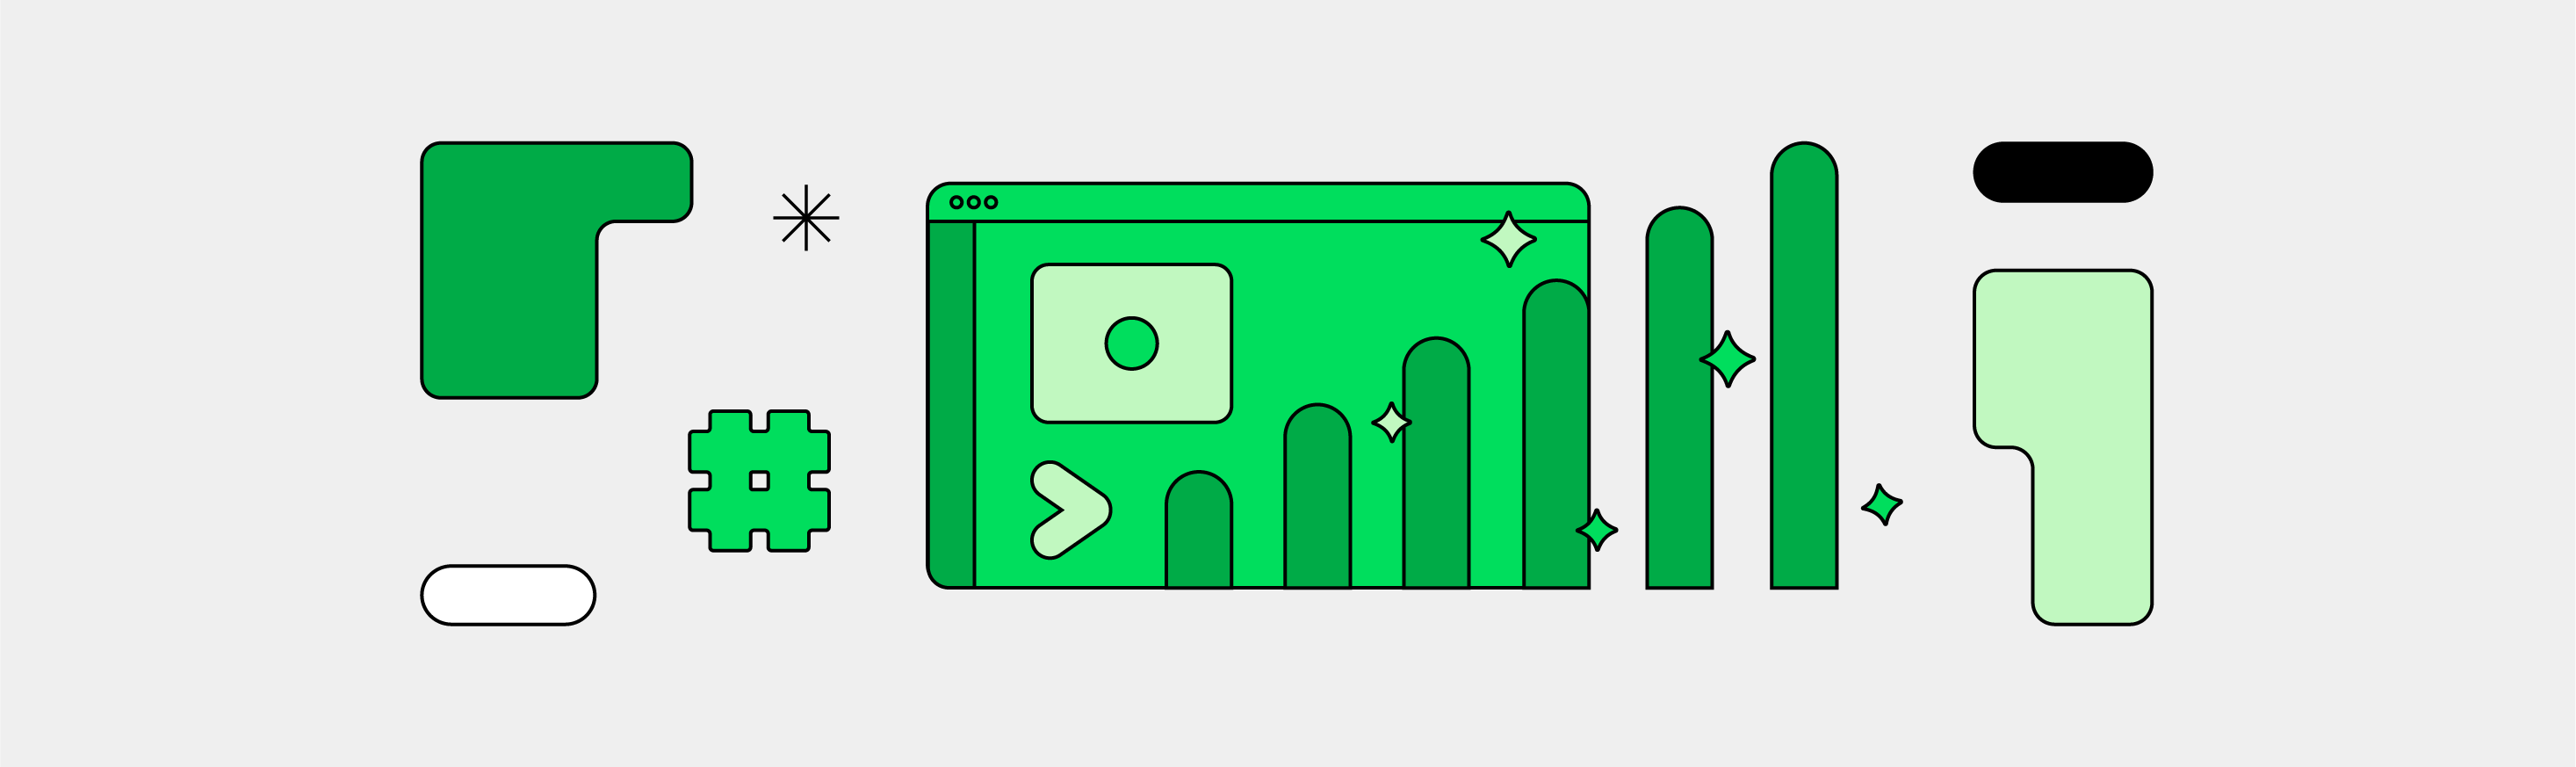

# LangExtract by Google DeepMind

`LangExtract` is a **Gemini-powered information extraction library** that makes it easy to extract structured insights from unstructured text — with **grounded extraction**, powerful prompting, and a visualizer for auditability.

> 🎯 Think of it like a smart assistant that can extract exactly what you want from messy, human-written text — and show you where it came from.

---

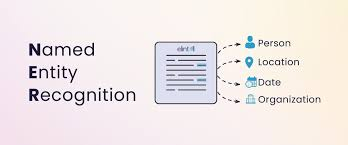


## 💡 Why LangExtract Is Useful

LangExtract helps you:
- Extract **entities, relationships, and emotions** from raw text
- Write **custom prompts** for different extraction needs
- Use **few-shot examples** to guide the model
- Save and **visualize results** (highlighted in HTML!)
- Ensure **traceability** with `source_span` (grounded extraction)

---




## 🔥 Real-World Use Cases

| Use Case                     | What LangExtract Can Do                                  |
|-----------------------------|-----------------------------------------------------------|
| 🏥 Clinical Notes            | Extract diagnosis, symptoms, medications, & timelines     |
| 📦 Product Reviews           | Extract sentiment, product features, issues, suggestions  |
| 🎭 Literature Analysis       | Pull out characters, emotions, and relationships          |
| 👨‍⚖️ Legal Documents          | Identify clauses, parties, dates, obligations              |
| 📚 Academic Research         | Extract citations, claims, evidence                       |

---

## 🆚 LangExtract vs Other Extraction Tools

| Tool/Library     | Language Model     | Grounded Output | Prompt Customization | Visualization | Complexity |
|------------------|--------------------|------------------|-----------------------|---------------|------------|
| **LangExtract**  | Gemini 1.5/2.5     | ✅ Yes           | ✅ Full Control        | ✅ Built-in    | 🟢 Easy     |
| **LangChain** (`lc.extractors`) | Any (via LangChain) | ❌ Usually not       | ⚠️ Limited JSONSchema | ❌ None     | 🟡 Medium    |
| **kor** (Fixie/Kor) | OpenAI / Anthropic | ✅ Optional     | ✅ Schema + Prompt     | ❌ None       | 🟡 Medium    |
| **ReLLM (by Recital)** | Proprietary LLMs | ✅ Yes          | ✅ Pattern/RAG-based   | ✅ Visual UI  | 🔴 Complex   |
| **Haystack**     | Open-source stack  | ⚠️ Sometimes     | ✅ Templates           | ⚠️ Requires setup | 🔴 Complex   |

---

# Useful Links for LangExtract & Related Tutorials

- [Kor Library](https://eyurtsev.github.io/kor/)
- [LangChain Classification Tutorial](https://python.langchain.com/docs/tutorials/classification/)
- [LangChain Extraction Tutorial](https://python.langchain.com/docs/tutorials/extraction/)
- [LangExtract GitHub Repository](https://github.com/google/langextract)
- [Official Google Blog: Introducing LangExtract](https://developers.googleblog.com/en/introducing-langextract-a-gemini-powered-information-extraction-library/)

### 🔁 LangExtract: Multi-Pass Extraction

LangExtract allows you to improve the **recall** and **completeness** of extracted information by running multiple independent passes over the same input.

---

#### ✅ Why Use Multiple Passes?

LLMs (like Gemini) may sometimes miss entities in a single pass due to their **stochastic nature** (randomness in output).  
Running extractions multiple times helps uncover missed items.

---

#### ⚙️ How It Works

- Each pass runs the **same prompt and examples** independently.
- Results are then **merged intelligently**.

**Merging Strategy:**

- 🥇 **"First-pass wins"**:  
  If two extractions overlap, the one from the first pass is retained.

- ➕ **Add unique entities**:  
  New non-overlapping results from later passes are added to the final output.

---

#### 🔢 Example

```python
result = lx.extract(
    text_or_documents=your_text,
    prompt_description=your_prompt,
    examples=your_examples,
    model_id="gemini-2.5-pro",
    extraction_passes=3  # 👈 Enables multiple passes
)



In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import textwrap
import langextract as lx

In [3]:
prompt = textwrap.dedent("""\
Extract structured medical data from the report.
Use exact phrases from the text for each field. Do not paraphrase or infer.
Return attributes like diagnosis, treatment, and follow-up using the same words used in the original report.
""")

In [4]:
# 2. Provide a high-quality example to guide the model
examples = [
    lx.data.ExampleData(
        text=(
            "Patient Name: Jane Smith. Age: 43. Diagnosis: Left lower lobe pneumonia. "
            "Treatment: Oral antibiotics. Follow-up in 10 days."
        ),
        extractions=[
            lx.data.Extraction(
                extraction_class="diagnosis",
                extraction_text="Left lower lobe pneumonia",
                attributes={"type": "infectious"}
            ),
            lx.data.Extraction(
                extraction_class="treatment",
                extraction_text="Oral antibiotics",
                attributes={"route": "oral"}
            ),
            lx.data.Extraction(
                extraction_class="follow_up",
                extraction_text="Follow-up in 10 days",
                attributes={"time_frame": "10 days"}
            ),
        ],
    )
]

In [8]:
# 3. Input: A sample unstructured radiology report
input_text = (
    "Patient Name: John Doe\n"
    "Age: 57\n"
    "Exam: Chest X-ray\n"
    "Findings: There is evidence of bilateral pulmonary infiltrates, more pronounced on the right side. "
    "No pleural effusion. Cardiomegaly is noted.\n"
    "Impression: Pneumonia, likely bacterial. Recommend IV antibiotics and follow-up in 7 days."
)

In [9]:
# 4. Run the extraction
result = lx.extract(
    text_or_documents=input_text,
    prompt_description=prompt,
    examples=examples,
    model_id="gemini-2.5-pro",
)

LangExtract: model=gemini-2.5-pro, current=282 chars, processed=282 chars:  [00:17]

✓ Extraction processing complete
✓ Extracted 5 entities (3 unique types)
  • Time: 17.61s
  • Speed: 16 chars/sec
  • Chunks: 1


In [10]:
print(f"Input: {input_text}\n")
print("Extracted entities:")
for entity in result.extractions:
    print(entity.extraction_text , entity.extraction_class)

Input: Patient Name: John Doe
Age: 57
Exam: Chest X-ray
Findings: There is evidence of bilateral pulmonary infiltrates, more pronounced on the right side. No pleural effusion. Cardiomegaly is noted.
Impression: Pneumonia, likely bacterial. Recommend IV antibiotics and follow-up in 7 days.

Extracted entities:
bilateral pulmonary infiltrates, more pronounced on the right side diagnosis
Cardiomegaly diagnosis
Pneumonia, likely bacterial diagnosis
IV antibiotics treatment
follow-up in 7 days follow_up


In [11]:
# Save the results to a JSONL file
lx.io.save_annotated_documents([result], output_name="extraction_results.jsonl") 
html_obj = lx.visualize(r".\\test_output\\extraction_results.jsonl")

LangExtract: Saving to test_output\extraction_results.jsonl: 1 docs [00:00, 153.35 docs/s]

✓ Saved 1 documents to test_output\extraction_results.jsonl



LangExtract: Loading test_output\extraction_results.jsonl: 100%|██████████████████████████████████████████████████▉| 1.67k/1.67k [00:00<00:00, 18.5kB/s]

✓ Loaded 1 documents from test_output\extraction_results.jsonl


In [12]:
from IPython.display import display

display(html_obj)

In [15]:
# 1. Define a concise prompt
prompt = textwrap.dedent("""\
Extract insights from the customer review. Identify sentiment, key features mentioned, complaints (if any), and improvement suggestions. Use exact phrases from the review where possible.
""")


In [16]:
# 2. Provide a high-quality example to guide the model
examples = [
    lx.data.ExampleData(
        text="This laptop is super fast and boots in seconds. However, the battery life is poor — barely lasts 3 hours.",
        extractions=[
            lx.data.Extraction(
                extraction_class="sentiment",
                extraction_text="super fast",
                attributes={"type": "positive"}
            ),
            lx.data.Extraction(
                extraction_class="feature",
                extraction_text="battery life",
                attributes={"issue": "poor"}
            ),
            lx.data.Extraction(
                extraction_class="suggestion",
                extraction_text="barely lasts 3 hours",
                attributes={"fix": "increase battery capacity"}
            ),
        ]
    )
]

In [17]:
# 3. Input: A sample unstructured radiology report
input_text = "I love the display quality of thie iphone 16, but the speakers are weak."

# 4. Run the extraction
result = lx.extract(
    text_or_documents=input_text,
    prompt_description=prompt,
    examples=examples,
    model_id="gemini-2.5-pro",
)


LangExtract: model=gemini-2.5-pro, current=72 chars, processed=72 chars:  [00:08]

✓ Extraction processing complete
✓ Extracted 3 entities (2 unique types)
  • Time: 8.30s
  • Speed: 9 chars/sec
  • Chunks: 1


In [18]:
print(f"Input: {input_text}\n")
print("Extracted entities:")
for entity in result.extractions:
    print(entity.extraction_text , entity.extraction_class)

Input: I love the display quality of thie iphone 16, but the speakers are weak.

Extracted entities:
love the display quality sentiment
display quality feature
speakers feature


In [20]:
# Save the results to a JSONL file
lx.io.save_annotated_documents([result], output_name="extraction_results.jsonl") 
html_obj = lx.visualize(r".\\test_output\\extraction_results.jsonl")

from IPython.display import display

display(html_obj)


LangExtract: Saving to test_output\extraction_results.jsonl: 1 docs [00:00, 501.41 docs/s]

✓ Saved 1 documents to test_output\extraction_results.jsonl



LangExtract: Loading test_output\extraction_results.jsonl: 100%|███████████████████████████████████████████████████████▉| 882/883 [00:00<00:00, 162kB/s]

✓ Loaded 1 documents from test_output\extraction_results.jsonl
